Notite:

Image Inpainting = reconstructia zonelor lipsa dintr-o imagine data. CU alte cuvinte sistemul trebuie sa umple zonele lipsa, "golurile" dintr-o imagine data.

Dataset:
  - Imagini color, de preferinta cu zone lipsa.
  - Daca nu gasesc dataset-uri cu masti predefinite, va trebui sa-mi generez eu mastile.
  - TinyImageNet
  - Orice dataset cu imagini color.
  - FARA MINST (e aproape binar),
    * Masti:
        - deja incluse in dataset (putin probabil)
        - predefinite (create inainte)
        - create dinamic (la momentul executiei)
        - Mastile trebuie sa aiba o diversitate foarte mare pentru a putea permite modelului sa generalizeze.
        - Sa nu depaseasta 50% din imagine. Peste 50% din imagine intram in task-ul de generare.
        - Incepem cu masti de dimensiuni mici apoi crestem dimensiunea usor usor pentru a vedea pana unde poate sistemul sa "umple golurile" din imagine.
          Ex: 1%, 3%, 5%, 8%, 10%, 15%, 20%, 25%, 30%, 40%, 50% din imagine. Sa nu depaseasca 50% din imagine dimensiunea mastii.
        - Forme geometrice simple: patrat, dreptunghi, cerc, elipsa.
        - Orice alte forme mai complexe, complicate.

Antrenare:
  - Un model fie antrenat pe o varietate mare de masti: atat forma(tipul) mastii cat si dimensiunea mastii trebuie sa fie variate.
  - Alt model sa fie antrenat pe masti fixe (forma si dimensiunile)
  SA VAD LA VALIDARE DACA MODELUL ANTRENAT PE MASTI VARIABLIE(forma si dimensiunea) se comporta mai bine decat cel antrenat pe masti fixe. E O IDEE FOARTE FOARTE BUNA.
  "Poți face un alt studiu de ablație chiar pe asta - antrenezi un model pe măști fixe, apoi un altul variind forma / procentul, și apoi vezi la validare dacă modelul antrenat cu măști variate generalizează mai bine.
 "
  - Sistemul trebuie sa fie antrenat de noi, daca nu sa folosesc transfer learning.
  - Ex: atunci cand parsez un batch, generez cate un tip de masca cu o anumita dimensiune, pentru fiecare imagine din batch, aplic masca pe imagine => imaginea cu goluri de implut.

Validare:
  - Treptat, pentru acelasi tip de masca, cresc dimensiunea (pana la un max de 50% din imagine) si masor performantele. Ideea este sa vad pana la ce dimensiune maxima a mastii sistemul este capabil sa generalizeze.
  - Schimb tipul de masca si repet procesul.

Metrici de performanta:
- PSNR(peak signal-noise ratio) dintre imaginea generata si imaginea originala
- SSIM(structural similarity index measure) -> imaginea generata si imaginea originala
- FID
- Alte metrici

Ideea de baza pentru un studiu de ablatie - să scoatem in evidenta un anumit aspect.  
Studiul de ablatie (exemple):
- La validare:
  Pentru acelasi tip de masca, pornim de dimensiune mica => masuram performanta
  Pentru acelasi tip de masca, crestem dimensiunea => masuram performanta
  Pentru acelasi tip de masca, crestem si mai mult dimensiunea => masuram performanta.
  Schimbam tipul de masca si repetam procesul anterior.

- Facem pruning(eliminam o parte din parametrii)(nu stiu daca la antrenare sau validare) si masuram compromisul dintre performanta si rata de compresie a modeului

- Antrenam pe imagini cu rezolutii mici. Testam pe imaginii cu rezolutii mari. Pana in ce punct modelul este in stare sa umple golurile.

- Antrenam alt model pe masti fixe(forma si dimensiuni fixe) apoi vedem cat e de bun fata de ala cu masti variabile.
"Poți face un alt studiu de ablație chiar pe asta - antrenezi un model pe măști fixe, apoi un altul variind forma / procentul, și apoi vezi la validare dacă modelul antrenat cu măști variate generalizează mai bine.
 "

- Inspiratie din paper-uri: pot sa ma uit in paper-uri sa vad ce au facut aia, incerc sa reproduc ce au facut aia, DAR cu alte date si/sau cu alte modele.

+ Explicatii in scris la ce am facut = studiu de ablatie.


Comparatii cu ceea ce exista deja:
 - Trebuie neaparat sa fac comparatii cu lucruri care exista deja, sa ma pot raporta la ceea ce sa facut deja de catre altii.
 - Initial ma pot uita la rezultate obtinute fara retele (clasic ML) apoi pot vedea ce sa facut cu retele neurale.

paperswithcode.com

Proiectul trebuie sa fie modular. Trebuie sa gandesc proiectul in asa fel incat profesorul sa il poata rula, fara efort.

**Decizii**

# 1. Dataset:
-TinyImageNet

# 2. Antrenare:
  2.0 Aleg un set de date.  
  2.1 Antrenarea unui model pe masti fixe(tip si dimensiuni) pe setul de date de la 2.0.    
  2.2. Antrenarea altui model pe masti variabile(tip si dimensiuni) pe setul de date de la 2.0.

# 3. Validare(testare)
1.  Aleg un set de date de validare. Poate fi cel de la 2.0 sau alt set de validare
2.  Antrenez modelul
3.  Testarea:  
      3.1  Fixez un tip de masca.  
      3.2. Fixez o dimensiune a mastii.  
      3.3  Baleez setul de validare, aplic masca pe imagine si masor performantele  
      3.4. Modific dimensiunea mastii prin crestere usoara(Ex: 1%, 3%, 5%, 10%, 15%, 20%, 25%, 30%, 40%, 50%).
      3.5 Repet pasul 3.3 pentru acelasi tip de masca dar dimensiunea noua fixata la pasul 3.4
      3.6. Modific tipul mastii
      3.7 Repet pasii 3.2 -> 3.5
      SI  
      3.1' Fixez un tip de masca  
      3.2' Fixez o dimensiune a mastii prin crestere usoara(Ex: 1%, 3%, 5%, 10%, 15%, 20%, 25%, 30%, 40%, 50%).
      3.3' Baleez setup de date si modific incremental dimensiunea mastii(Ex: 1%, 3%, 5%, 10%, 15%, 20%, 25%, 30%, 40%, 50%).  
      3.4' Masor performantele

# 4. Studii de ablatie ( aici cred ca mai trebuie lucrat)
4.1. Testare model antrenat pe masti fixe(dimensiune masca + tip masca) folosind subsetul de validare al setului de date pe care a fost antrenat. Pasii de testare sunt descrisi in sectiunea 3.   
4.2  Testare model antrenat pe masti variabile(dimensiune masca + tip masca).  folosind subsetul de validare al setului de date pe care a fost antrenat. Pasii de testare sunt descrisi in sectiunea 3.    
  * Comparatie intre modelele 4.1 si 4.2. => care din ele e mai bun.  
  * Comparatie modele 4.1 si 4.2 versus literatura de specialitate. Concluzii.   
4.3 Repetarea pasilor 4.1->4.2 dar folosind un subset de validare ce apartine altui set de date diferit de cel folosit la validare, cu imagini ale rezolutiilor mai mari.
4.6 Repetarea pasilor 4.1->4.5 folosind alte seturi de date pentru antrenarea modelelor.

4.7 Pruning ????????  
Vezi si prin paper-uri ce alte studii de ablatie mai poti face.

# 5. Metrici de Performanta
Aici trebuie sa alegi metricii de performanta ai modelelor. Cum masori performanta modelelor ???

In [ ]:
# Imports - put here all the imports, no need to repeat them in other cells
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import Sampler
from torchvision.io import ImageReadMode, read_image
import numpy as np
from matplotlib import pyplot as plt
from typing import Literal
from pathlib import Path
import urllib.request
import zipfile
import shutil
import os
import cv2 as cv
import random
import math
import gdown
import copy

**TinyImageNet Class**  
The project uses TinyImageNet Dataset.  
This class represents an interface between the dataset and the project.
This class is used to return an image from the dataset, belonging to either 'Test', 'Train', 'Val' subsets.

*TinyImageNet members(properties):*
*   **self.root** -> the root folder where the dataset will be downloaded and extracted.
The *TinyImageNet* dataset is in the form of a single .zip file downloaded from the following url's: [Official Link](http://cs231n.stanford.edu/tiny-imagenet-200.zip), [Alternative Link - My Google Drive](https://drive.google.com/file/d/1oEWC2523lLT4L7nVfDkj2qcO89eq6Zhp/view?usp=sharing)
* **self.split** = 'Train', 'Test', 'Val' -> the subset used to return an image from.

**When defining a new TinyImageNet object, one can choose to specify a new root folder name and a split, diferent from the default ones.**

* self.img_folder -> folder where the contents of the dataset archive(tiny-imagenet-200.zip) are extracted.

* self.train_folder -> folder containing images belonging to the train subset.

* self.test_folder -> folder containing images belonging to the test subset.

* self.val_folder -> foler containing images belonging to the val subset.

*TinyImageNet Methods:*  
1.  __init__(self, root='tinyimagenet', split: Split='train'):  
  Class constructor.
  Parameters:
  *   root='tinyimagenet'  ->the root folder where the dataset will be downloaded and extracted
  *   split: Split='train' -> what subset to use in order to get the image. Values are 'train', 'test', 'val'.

  The constructor is responsible for downloading, extracting, moving, renaming the dataset files in the appropriate location.
  I want all the images to have the folder structure:
  * ROOT/train/images -> for training subset
  * ROOT/test/images -> for test subset
  * ROOT/val/subset -> for val subset.

  The constructor makes sure the above folder structure is created.  
  When accesing an image using __getitem__[i], i is the image index. Depending on the split, the index has to be inside a certain range. The images are renamed with numbers in the range of their corresponding split. So __getimage__[i] from the current set split means get image i.JPEG corresponding to the current set split. The constructor calls __rename_images for this operation.
  
2. __dataset_file_exists(url):
  Parameters:  
  * url-> the address of the dataset archive.

  Private Method.  
  Checks if the dataset archive is available at url.
  The constructor uses this method to check if the two download links containing the dataset archive are valid.

3. __getitem__(index):  
  Parameters:
  * index -> the index of the file being requested. The file index is the same as the filename.

  Dunder method. This method is called when using the [] operator.  
  Used to retrive a file from the dataset using the [index] operator

  Returns:
  * image: [torch.Tensor] -> the requested image at index index in the form of a torch.Tensor object with shape (channel_count, image_height, image_width)

4. __len__():  
  Dunder Method.  
  Returns the total number of images in the TinyImageNet dataset.

5. __count_images(split: Split):  
  Parameters:
  * split:[Split] -> the desired split for whitch one wants to count the number of images. May have values: 'train', 'test', 'val'.

  Private Method.  
  Counts the total number of images corresponding to split.

6. __rename_images(split, start_index=None):  
  Parameters:
  * split:[Split] -> the split for whitch one wants to rename the images.
  * start_index:[int] -> the starting number from whitch to begin renaming images.

  Returns:
    * count:[int] -> the last index + 1 used to rename the last image.

  Private Method.  
  This method renames all images corresponding to split, using an incrementing index, starting from start_index.  
  Ex: 0.JPEG, 1.JPEG, 2.JPEG, 3.JPEG, .., coresponding to split.  
  This method is used by the constructor to rename images to 'number.JPEG' coresponding to 'train', 'test', 'val' splits.  
  This renaming of files makes retriving a file with __getitem__(index) very easy.

7. set_split(split: Split):  
  Parameters:
  * split:[Split] -> the new value of self.split

  Public Method.  
  Setter for self.split. Changes the current set split. Values can be 'train', 'test', 'val'.

8. get_split():
  Returns:
  * the current value of self.split

  Getter for current split. Returns the current value of split

9. cleanUp(download=False):  
  Parameters:
  * download:[boolean] -> deletes the dataset zip file or not. True = deletes; False = does not delete

  Public Method  
  Deletes all the images folder extracted from the dataset zip file.  
  Optionally, depending on download(True/False), deletes the dataset zip file or not.  
  Useful when you perform debugging and want to do a cleaup aka delete all extracted images and/or dataset zip file.
  

In [ ]:
# Define TinyImageNet class

# define the split type
Split = Literal['train', 'test', 'val']

# define de TinyImageNet class
class TinyImageNet(Dataset):
  def __init__(self, root='tinyimagenet', split: Split='train'):
    self.root = Path(root)

    # define the archive filename
    filename = self.root / 'tiny-imagenet-200.zip' # root is a Path object

    # define variables for folders
    self.img_folder = self.root / 'tiny-imagenet-200' # images folder
    self.train_folder = self.img_folder / 'train'
    self.test_folder = self.img_folder / 'test' / 'images'
    self.val_folder = self.img_folder / 'val' / 'images'

    # define self.split
    self.split = split

    # create root directory if needed
    if not self.root.exists():
      self.root.mkdir()
    if not self.root.exists():
      raise Exception('Dataset directory was not created')

    # filename does not exist - i have to download the dataset
    if not filename.exists():
      official_url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'# download dataset if needed
      my_google_drive_url = 'https://drive.google.com/file/d/1oEWC2523lLT4L7nVfDkj2qcO89eq6Zhp/view?usp=sharing' # tiny-image-net-200.zip hosted on my google drive
      if self.__dataset_file_exists(official_url):
        url = official_url
      elif self.__dataset_file_exists(my_google_drive_url):
        url = my_google_drive_url
      else:
         raise FileNotFoundError('Cannot Download the dataset file.')
      print('Downloading Dataset')
      urllib.request.urlretrieve(url, filename)
      print('Dataset Downloaded')
    else: print("Dataset archive already downloaded")

    # Extract the zip archive if needed
    if not self.img_folder.exists():
      print('Extracting Zip Archive')
      with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(root)
        print('Zip archive extracted succesfully.')

      # for the training subset, move all the images in ROOT/train/images
      print("For the training subset, moving images to train/images")
      new_train_folder = self.train_folder / 'images'
      # copy images into train/images
      if not new_train_folder.exists():
        new_train_folder.mkdir()
      for root, dirs, files in os.walk(self.train_folder):
        for file in files:
          if file.endswith('.JPEG'):
            old_filename = os.path.join(root, file)
            new_filename = os.path.join(new_train_folder, file)
            shutil.move(old_filename, new_filename)

      # delete all the directoris in self.train_folder that are not names 'images'
      for root, dirs, files in os.walk(self.train_folder):
        for dir in dirs:
          # delete dir if name is not images (at this stage, dir is empty)
          if str(dir) != 'images':
            shutil.rmtree(os.path.join(root, dir))
      print(f'Finished moving images, for the training subset, to {self.train_folder}/images')
      self.train_folder = self.train_folder / 'images'

      # rename images from train folder
      start_index = self.__rename_images('train')

      # rename images from test folder
      start_index = self.__rename_images('test', start_index)

      # rename images from val folder
      self.__rename_images('val', start_index)

    else:
      print('Zip archive already extracted')
      self.train_folder = self.train_folder / 'images'

  def __dataset_file_exists(self, url):
    """
    This function takes url as parameter and checks if the file present at url exists.
    @returns:
      True - file exists
      False - file does not exist
    @param: url: a string with an url to the dataset file.
    """
    request = urllib.request.Request(url, method='HEAD')
    try:
        with urllib.request.urlopen(request) as response:
            if response.status == 200:
                return True
            else:
                return False
    except urllib.error.HTTPError as e:
        print(f"HTTP error: {e.code} - {e.reason}")
    except urllib.error.URLError as e:
        print(f"URL error: {e.reason}")

  def __len__(self):
    """
    Returns the number of images in the dataset.
    """
    return self.__count_images('train') + self.__count_images('test') + self.__count_images('val')

  def __getitem__(self, index):
    """
    Returns the image(as tensor values) at the given index.
    Index is based on split value.
    For each test, train, val splits, the maximum index will be different.
    index is in range [0, max_index - 1], where max_index is the number of images in test, train, val splits. (different for each one)
    index cannot be grather than self.__len__(), index <= self.__len__() - 1
    """
    # index out of range
    if index >= self.__len__() or index < 0 or index == None:
        raise IndexError('Index out of range, valid index is between 0 and', self.__len__() - 1)

    # img_count_train + img_count_test + img_count_val == self.__len__()
    img_count_train = self.__count_images('train')
    img_count_test = self.__count_images('test')
    img_count_val = self.__count_images('val')

    if img_count_train + img_count_test + img_count_val != self.__len__():
      raise Exception('img_count_train + img_count_test + img_count_val != self.__len__(). THIS IS VERY VERY WEIRD WHAT IS HAPPENING!!!!!!. CHECK CODE AND DATASET!!!!!')

    # print('train index range: [', 0, img_count_train - 1, ']')
    # print('test index range: [', img_count_train, (img_count_train + img_count_test) - 1, ']')
    # print('val index range: [', img_count_train + img_count_test, self.__len__() - 1, ']') # img_count_train + img_count_test + img_count_val = self.__len__()

    match self.split:
      case 'train': # train_index range [0, img_count_train - 1] ->
        # index out of range for selected split
        if not (index >= 0 and index <= img_count_train - 1):
          raise IndexError('Index out of range for split', self.split, 'valid index is [', 0, 'and', img_count_train - 1, ']')
        img = self.train_folder / (str(index) + '.JPEG')

      case 'test': # test_index range [img_count_train, (img_count_train + img_count_test) - 1] -> [ 100000 109999 ]
        # index out of range for selected split
        if not (index >= img_count_train and index <= (img_count_train + img_count_test) - 1):
          raise IndexError('Index out of range for split', self.split, 'valid index is [', img_count_train, 'and', img_count_test - 1, ']')
        img = self.test_folder / (str(index) + '.JPEG')

      case 'val': # val_index range [img_count_train + img_count_test, (img_count_train + img_count_test + img_count_val) = self.__len() - 1] -> [ 110000 119999 ]
        # index out of range for selected split
        if not (index >= img_count_train + img_count_test and index <= self.__len__() - 1):
          raise IndexError('Index out of range for split', self.split, 'valid index is [', img_count_test, 'and', img_count_val - 1, ']')
        img = self.val_folder / (str(index) + '.JPEG')

    # return the image as tensor. Image is RGB, no transparency
    # tensor on cpu
    return read_image(img, mode=ImageReadMode.RGB).to(device='cpu')  # Tensor[image_channels, image_height, image_width]

  def __count_images(self, split: Split):
    """
    Private Method
    Counts the number of images in a given path(folder)
    Helps to count the number of images in the test, train, val folders
    """
    path = None
    match split:
      case 'train':
        path = self.train_folder

      case 'test':
        path = self.test_folder

      case 'val':
        path = self.val_folder

    images_count = 0
    for root, dirs, files in os.walk(path):
      # don't care about the order of files and folder in dirs and files
      for file in files:
        if file.endswith('.JPEG'):
          images_count += 1
    return images_count

  def __rename_images(self, split, start_index=None):
    """
    Private method
    Renames the images related to the class split
    Makes it easier to index later on
    """
    match split:
      case 'train':
        path = self.train_folder

      case 'test':
        path = self.test_folder

      case 'val':
        path = self.val_folder

    print('Started Renaming images in', str(path))
    if start_index == None:
      count = 0
    else:
      count = start_index
    for root, dirs, files in os.walk(path):
      dirs.sort()
      for file in files:
        if file.endswith('.JPEG'):
          old_filename = os.path.join(root, file)
          new_filename = os.path.join(root, str(count) + '.JPEG')
          os.rename(old_filename, new_filename)
          count += 1
    print('Finished renaming images in', str(path))
    return count

  def set_split(self, split: Split):
    """
    Change the split to a different option(setter for self.split)
    Options are 'train', 'test', 'val
    """
    self.split = split

  def get_split(self):
    """
    Returns the current split (getter for self.split)
    """
    return self.split

  def cleanUp(self, download=False):
    """
    Delete the dataset folder.
    If download is True, delete the root folder and download the dataset again.
    """
    if download == True:
      shutil.rmtree(self.root)
      if not self.root.exists():
        print(str(self.root), 'was deleted. Zip file will be redownloaded.')
      else:
        print(str(self.root), 'was NOT deleted. Zip file is still there.')
    else:
      shutil.rmtree(self.img_folder)
      if not self.img_folder.exists():
        print(str(self.img_folder), 'was deleted. Zip file stil there.')
      else:
        print(str(self.img_folder), 'was NOT deleted. Zip file is still there.')

In [ ]:
# Test TinyImageNet objects

# create TinyImageNet object
dt = TinyImageNet(split='train')
print('Number of images:', dt.__len__())

# train split test
print('Train Split:')
print(dt[0])
print(dt[9999])

# test split test
print('Test Split:')
dt.set_split('test')
print(dt[100000])
print(dt[109999])

# val split test
print('Val Split:')
dt.set_split('val')
print(dt[110000])
print(dt[119999])

# do a tinyimagenet dataset cleanUp - uncomment next line
# dt.cleanUp(False) # dt.cleanUp(True)

Dataset archive already downloaded
Zip archive already extracted
Number of images: 120000
Train Split:
tensor([[[234, 230, 240,  ..., 119, 144, 129],
         [237, 245, 225,  ..., 121,  65, 118],
         [224, 211, 236,  ..., 182, 228,  82],
         ...,
         [204, 234, 251,  ..., 192, 197, 185],
         [255, 244, 224,  ..., 162, 162, 186],
         [212, 219, 241,  ..., 190, 152, 177]],

        [[215, 211, 221,  ...,  97, 120, 105],
         [218, 226, 206,  ...,  99,  41,  94],
         [205, 192, 217,  ..., 157, 202,  56],
         ...,
         [183, 213, 228,  ..., 166, 169, 157],
         [240, 224, 202,  ..., 134, 134, 158],
         [192, 199, 216,  ..., 162, 124, 149]],

        [[173, 169, 179,  ...,  76,  96,  79],
         [176, 184, 164,  ...,  78,  17,  68],
         [163, 150, 175,  ..., 135, 179,  31],
         ...,
         [130, 160, 176,  ..., 141, 147, 135],
         [181, 165, 145,  ..., 110, 112, 136],
         [129, 136, 159,  ..., 138, 102, 127]]], dty

In [ ]:
# Check number of images for each subset: train, test, val
print('Train folder images:', len(os.listdir('tinyimagenet/tiny-imagenet-200/train/images')))
print('Test folder images:', len(os.listdir('tinyimagenet/tiny-imagenet-200/test/images')))
print('Val folder images:', len(os.listdir('tinyimagenet/tiny-imagenet-200/val/images')))
print('__len__():', dt.__len__())

**ImageMask Class**

In [ ]:
# Define ImageMask class

# define the Mask type
MaskType = Literal['rectangle', 'circle', 'ellipse', 'custom']

# Define ImageMask class - takes an images, applies a mask, returns the results
class ImageMask():
  # class constructor
  def __init__(self, image: torch.Tensor, mask_type: MaskType, mask_dim, redownload_custom_masks='False'):
    """
    This object takes a tinyimagenet image, applies a mask on it and returs the result.
    Works with only one image of the tinyimagenet dataset.

    image: torch.Tensor - input image to work with.
    mask_type: MaskType - type of mask to apply.
    mask_dim: Tuple/string - dimensions of the mask. Depends on MaskType. (height_length, width_length) in pixels, of mask_type.
      rectangle: (height_length, width_length) of mask
      circle: (radius_length,) of mask
      ellipse: (major_axis_length, minor_axis_length, angle, start_angle, end_angle,) of mask
                angle - the orientation of the ellipse in degrees. aka the rotation of the ellipse.(angle between major axis and x axis)
                start_angle - the starting angle of the ellipse in degrees.
                end_angle - the ending angle of the ellipse in degrees.
                modifiyng start_angle and end_angle you can get 1/2, 1/4, 3/4 quadrants of the ellipse.
      custom: string -> Each custom mask has the name 1.png, 2.png, 3.png, 4.png .. etc. The mask_dim for MaskType=custom is the name of the custom mask aka 1.png, 2.png, 3.png, etc.
    """
    # download custom masks
    self.set_redownload_custom_masks(redownload_custom_masks)

    # set the image to work with
    self.set_image(image)

   # set mask settings
    self.set_mask(mask_type, mask_dim)

  def __TensorToImage(self, image: torch.Tensor):
    """
    Input:
      image: torch.Tensor - input image.
    Output:
      image: numpy.ndarray - output image (opencv works with numpy arrays).

    Convers the input image into a numpy array.
    This is needed by opencv.
    """
    # Tensor[image_channels, image_height, image_width]
    if image.device != 'cpu':
      return image.cpu().numpy().transpose(1, 2, 0) # numpy array (image_height, image_width, image_channels) - that is why i need to transpose
    else:
      return image.numpy().transpose(1, 2, 0) # numpy array (image_height, image_width, image_channels) - that is why i need to transpose

  def __ImageToTensor(self, image: np.ndarray) -> torch.Tensor:
    """
    Input:
      image: numpy.ndarray - input image.
    Output:
      image: torch.Tensor - output image.

    Convers the input image(numpy array - needed by opencv) into a torch.Tensor.
    This is needed by PyTorch.
    The resulting torch.Tensor is of shape [image_channels, image_height, image_width] -> this is the shape that pytorch requires.
    """
    return torch.from_numpy(image.transpose(2, 0, 1)).to(device='cpu') # torch.Tensor of shape (image_channels, image_height, image_width]). This is what pytorch expects

  def set_redownload_custom_masks(self, redownload_custom_masks):
    """
    Setter for redownload_custom_masks flag
    Sets the redownload_custom_masks flag to True or False.
    Useful if i want to tell the object to redownload the custom masks.
    It also downloads the custom masks
    """
    self.__redownload_custom_masks = redownload_custom_masks

    # my google drive shared folder with custom masks.
    custom_mask_url = 'https://drive.google.com/drive/folders/1luzOcP2q-Piu3RwQK8IDFMkm-EQlAJmE?usp=sharing'
    self.__custom_masks_folder = os.getcwd() + '/custom-masks'

    # When i upload new masks, i will need this flag to load the new updated masks
    if self.__redownload_custom_masks == 'True':
      if os.path.exists(self.__custom_masks_folder):
        # delete the custom_masks folder
        shutil.rmtree(self.__custom_masks_folder)

    if not os.path.exists(self.__custom_masks_folder):
      os.makedirs(self.__custom_masks_folder, exist_ok=True)
      print(f"Downloading contents of folder: {custom_mask_url}")
      gdown.download_folder(custom_mask_url, output=self.__custom_masks_folder, quiet=False, use_cookies=False)
    else:
      print("Custom masks folder already downloaded.")

  def get_redownload_custom_masks():
      """
        Returns the redownload_custom_masks flag.
      """
      return self.__redownload_custom_masks

  def set_image(self, image: torch.Tensor):
    """
    Input:
      image: torch.Tensor - input image.

    Setter for input image.
    Sets the working image of the object.
    The working image must be a torch.Tensor image of the tinyimagenet database.
    """
    self.original_image = self.__TensorToImage(image) # np.ndarray of shape [image_height, image_width, image_channels]
    self.original_image_height = self.original_image.shape[0]
    self.original_image_width = self.original_image.shape[1]

  def set_mask(self, mask_type: MaskType,  mask_dim: tuple):
    """
      Setter for mask_type and mask_dim
      Sets the mask_type and mask_dim for current image
    """
    self.mask_type = mask_type
    self.mask_dim = mask_dim
    self.mask = None
    self.modified_image = copy.deepcopy(self.original_image) # Makes a deep copy of the original image(original image remains intact). This is meant to be altered.
    self.mask_applied = False # for a new image, the mask is not yet applied

    # define some helper variables
    match self.mask_type:
      case 'rectangle':
        self.rect_height = self.mask_dim[0]
        self.rect_width = self.mask_dim[1]

      case 'circle':
        self.circle_radius = self.mask_dim[0]

      case 'ellipse':
        self.ellipse_major_axis = self.mask_dim[0]
        self.ellipse_minor_axis= self.mask_dim[1]
        self.ellipse_angle = self.mask_dim[2]
        self.ellipse_start_angle = self.mask_dim[3]
        self.ellipse_end_angle = self.mask_dim[4]

      case 'custom':
        if os.path.exists(self.__custom_masks_folder + '/' + mask_dim):
          self.__custom_mask = self.__custom_masks_folder + '/' + mask_dim # This image exists
          self.__custom_mask = self.__TensorToImage(read_image(self.__custom_mask, mode=ImageReadMode.RGB).to(device='cpu'))  # numpy array of shape (image_height, image_width, image_channels) , mode=ImageReadMode.GRAY

          # binarize mask. Values equal to 0 stay at 0; values greather than 0 become 255 (pure white)
          self.__custom_mask = np.where(self.__custom_mask > 0, 255, 0).astype(np.uint8)
        else:
          raise Exception(f"mask dim has to be the name of the custom mask file aka 1.png, 2.png, 3.png etc. {mask_dim} is not a valid custom mask file.")

    # mask lengths are valid (within image dimensions)
    match self.mask_type:
      case 'rectangle':
        if self.rect_height > self.original_image_height or self.rect_width > self.original_image_width:
          raise Exception('[Rectangle Mask]: Mask height length and width length cannot be greater than image height and image width.')

      case 'circle':
        if self.circle_radius > (self.original_image_height // 2) - 1 or self.circle_radius > (self.original_image_width // 2) - 1:
          raise Exception('[Circle Mask]: Mask radius cannot be greater than', (self.original_image_height // 2) - 1, 'or', (self.original_image_width // 2) - 1)

      case 'ellipse':
        if self.ellipse_minor_axis > self.ellipse_major_axis:
          raise Exception('[Ellipse Mask]: Minor axis greather than major axis.')

        if self.ellipse_major_axis > self.original_image_height or self.ellipse_major_axis > self.original_image_width:
          raise Exception('[Ellipse Mask]: Major axis greather than image width or height.')

        if self.ellipse_minor_axis > self.original_image_height or self.ellipse_minor_axis > self.original_image_width:
          raise Exception('[Ellipse Mask]: Major axis greather than image width or height.')

        # ellipse angle
        if self.ellipse_angle not in [0, 45, 90, 180, 270, 360]:
          raise Exception('[Ellipse Mask]: Mask angle must be 0, 45, 90, 180, 270, 360')

        # starting angle need to be 0 , end angle need to be 360 - always full elipse
        if self.ellipse_start_angle != 0 or self.ellipse_end_angle != 360:
          raise Exception('[Ellipse Mask]: Mask start angle must be 0 and end angle must be 360')

        match self.ellipse_angle:
          case 0 | 180 | 360:
            if self.ellipse_major_axis > (self.original_image_width // 2) - 1 or self.ellipse_minor_axis > (self.original_image_height // 2) - 1:
              raise Exception('[Ellipse Mask]: For angle', self.ellipse_angle, 'Major axis cannot be greather then', (self.original_image_width // 2) - 1, 'Minor axis cannot be greather then', (self.original_image_height // 2) - 1)

          case 90 | 270:
            if self.ellipse_major_axis > (self.original_image_height // 2) - 1 or self.ellipse_minor_axis > (self.original_image_width // 2) - 1:
              raise Exception('[Ellipse Mask]: Major axis cannot be greather then', (self.original_image_height // 2) - 1, 'Minor axis cannot be greather then', (self.original_image_width // 2) - 1)

          case 45 | 135 | 225 | 315:
            if self.ellipse_major_axis > math.sqrt(self.original_image_height ** 2 + self.original_image_width ** 2) or self.ellipse_minor_axis > math.sqrt(self.original_image_height ** 2 + self.original_image_width ** 2):
              raise Exception('[Ellipse Mask]: Major axis and minor axis cannot be greather then', math.sqrt(self.original_image_height ** 2 + self.original_image_width ** 2))

       # Does my custom mask have the correct width and height ?
      case 'custom':
        self.__custom_mask_height = self.__custom_mask.shape[0]
        self.__custom_mask_width = self.__custom_mask.shape[1]

        # custom mask height and with must match original image height and width
        if self.__custom_mask_height != self.original_image_height or self.__custom_mask_width != self.original_image_width:
          raise Exception('Custom mask dimensions do not match original image dimensions.')

  def __gen_starting_point(self):
    """
    Generates a random point of (x, y) coordinates in the image. This point is the starting point of the mask.
    (x, y) point = starting point of mask.

    x -  value of x axis = image width
    y - value of y axis = image height

    Output:
      point: Tuple - (x, y) coordinates of the random point.
    """
    x = None
    y = None

    # init seed engine
    random.seed()
    match self.mask_type:
      # rectangle mask starting point
      case 'rectangle':
        rectangle_offset = 1
        x = random.randrange(rectangle_offset, self.original_image_width - (self.rect_width + rectangle_offset) + 1, 1)
        y = random.randrange(rectangle_offset, self.original_image_height - (self.rect_height + rectangle_offset) + 1, 1)

      # circle mask starting point
      case 'circle':
        circle_offset = 1
        x = random.randrange(self.circle_radius + circle_offset , (self.original_image_width - (self.circle_radius + circle_offset )) + 1, 1)
        y = random.randrange(self.circle_radius + circle_offset , (self.original_image_height - (self.circle_radius + circle_offset )) + 1, 1)

       # ellipse mask starting point
      case 'ellipse':
        ellipse_offset = 9 # was 9
        match self.ellipse_angle:
          # major axis is on x axis, minor axis is on y axis
          case 0 | 180 | 360:
            x = random.randrange((self.ellipse_major_axis // 2) +  ellipse_offset, (self.original_image_width - ((self.ellipse_major_axis // 2) + ellipse_offset)) + 1, 1)
            y = random.randrange((self.ellipse_minor_axis // 2) +  ellipse_offset, (self.original_image_height  - ((self.ellipse_minor_axis // 2) + ellipse_offset)) + 1, 1)

          # major axis is on y axis, minor axis is on x axis
          case 90 | 270:
            x = random.randrange((self.ellipse_minor_axis // 2) + ellipse_offset, (self.original_image_width- ((self.ellipse_minor_axis // 2) + ellipse_offset)) + 1, 1)
            y = random.randrange((self.ellipse_major_axis // 2) + ellipse_offset, (self.original_image_height  - ((self.ellipse_major_axis // 2) + ellipse_offset)) + 1, 1)

          # major axis is 45/135/225/315 angle with x axis
          case 45 | 135 | 225 | 315:
            rad_angle = math.radians(self.ellipse_angle)
            const_x = self.ellipse_major_axis * math.cos(rad_angle)
            const_x = int(const_x)

            const_y = self.ellipse_major_axis * math.cos((math.pi // 2) - rad_angle)
            const_y = int(const_y)

            ellipse_45_offset = 11 # was 12
            x = random.randrange((const_x // 2) + ellipse_45_offset, (self.original_image_width - ((const_x // 2) + ellipse_45_offset)) + 1, 1)
            y = random.randrange((const_y // 2) + ellipse_45_offset, (self.original_image_height - ((const_y // 2) + ellipse_45_offset)) + 1, 1)

    return (x, y)

  def __create_blank_mask(self):
    """
    Output:
      blank_mask: numpy.ndarray - blank mask.

    Creates a blank mask.
    """
    blank_mask  = np.zeros((self.original_image.shape[0], self.original_image.shape[1], 3), dtype=np.uint8) # 0 = black = full transparency
    blank_mask = cv.cvtColor(blank_mask, cv.COLOR_BGR2RGB)
    return blank_mask

  def __create_rectangle_mask(self):
    """
    Output:
      rectangle_mask: numpy.ndarray - rectangle mask.

    Creates a rectangle mask.
    """
    if self.mask_type != 'rectangle':
      raise Exception('Cannot create rectangular mask. Mask type is not rectangular.')

    blank_mask = self.__create_blank_mask()
    point1 = self.__gen_starting_point()
    point2 = (point1[0] + self.mask_dim[1], point1[1] + self.mask_dim[0])
    rectangle_mask  = cv.rectangle(blank_mask, point1, point2, (255, 255, 255), cv.FILLED) # 0 = black = full transparency. 1 = white = full opaque. Mask is full opaque aka white.
    rectangle_mask = cv.cvtColor(rectangle_mask, cv.COLOR_BGR2RGB)
    return rectangle_mask

  def __create_circle_mask(self):
    """
    Output:
      circle_mask: numpy  - circle mask.

    Creates a circle mask.
    """
    if self.mask_type != 'circle':
      raise Exception('Cannot create circle mask. Mask type is not circle')

    blank_mask = self.__create_blank_mask()
    center_point =  self.__gen_starting_point()
    circle_mask = cv.circle(blank_mask, center_point, self.circle_radius, (255, 255, 255), cv.FILLED) # 0 = black = full transparency. 1 = white = full opaque. Mask is full opaque aka white.
    circle_mask = cv.cvtColor(circle_mask, cv.COLOR_BGR2RGB)

    return circle_mask

  def __create_ellipse_mask(self):
    if self.mask_type != 'ellipse':
      raise Exception('Cannot create circle mask. Mask type is not circle')

    blank_mask = self.__create_blank_mask()
    center_point = self.__gen_starting_point()
    ellipse_mask = cv.ellipse(blank_mask, center_point, (self.ellipse_major_axis, self.ellipse_minor_axis), self.ellipse_angle, self.ellipse_start_angle, self.ellipse_end_angle, (255, 255, 255), cv.FILLED)
    ellipse_mask = cv.cvtColor(ellipse_mask, cv.COLOR_BGR2RGB)

    return ellipse_mask

  def __apply_mask(self):
    """
    Applies the mask to the image.
    This function creates the final mask that will be applied to the input image
    """
    match self.mask_type:
      # rectangle mask
      case 'rectangle':
        self.mask = self.__create_rectangle_mask()

      # circle mask
      case 'circle':
        self.mask = self.__create_circle_mask()

      # ellipse mask
      case 'ellipse':
        self.mask = self.__create_ellipse_mask()

      case 'custom':
        self.mask = self.__custom_mask

    # apply mask to original image
    # here self.modified_image is the same deep copy as self.original_image
    self.modified_image = cv.bitwise_or(self.modified_image, self.mask)
    self.mask_applied = True

  def get_modified_image(self):
    """
    Output:
      image: torch.Tensor - output image (final result).

    Inside the class, processing is done using ndarray(opencv requires numpy array, not tensors).
    Getter for output image.
    This is the final result aka the original image + mask applied to it.
    """
    # check if mask was applied
    if self.mask_applied == False:
      self.__apply_mask()
      self.mask_applied = True
    return self.__ImageToTensor(self.modified_image)  # convert opencv image(numpy array) to torch.Tensor shape [image_channels, image_height, image width]

  def get_original_image(self):
    """
    Output:
      image: torch.Tensor - image
    Getter for original image passed to the constructor, or previously set with set_image() method
    Output is a torch.Tensor
    """
    return self.__ImageToTensor(self.original_image)  # convert opencv image(numpy array) to torch.Tensor of shape [image_channels, image_height, image width]

  def get_mask_status(self) -> tuple:
    """
    Getter for mask type + mask dimensions.
    Returns the mask type + mask dimensions in a tuple
    """
    return (self.mask_type, self.mask_dim)

  def get_mask_value(self):
    """
    Getter for mask value
    Returns the actual mask applied to the image
    Useful when i want to knwo what mask was applied to the image.
    """
    return self.mask

  def plot_results(self):
    """
    Plots the original image and the altered image.
    This is useful for debugging. I want to see original image, mask and the final result(original image + mask applied) side by side.
    """
    # check if mask was applied
    if self.mask_applied == False:
      self.__apply_mask()

    # Create a figure with two subplots
    plt.figure()
    fig, axes = plt.subplots(1, 3, facecolor = 'black')

    # Display the Original Image
    axes[0].imshow(self.original_image)
    axes[0].axis('off')  # Hide the axes
    axes[0].set_title('Original Image', color = 'white')
    axes[0].set_facecolor((0,0,0))

     # Display the Mask
    axes[1].imshow(self.mask)
    axes[1].axis('off')  # Hide the axes
    axes[1].set_title('Mask', color = 'white')
    axes[1].set_facecolor((0,0,0))

    # Display the modified image
    axes[2].imshow(self.modified_image)
    axes[2].axis('off')  # Hide the axes
    axes[2].set_title('Modified Image', color = 'white')
    axes[2].set_facecolor((0,0,0))

    # Show the plot
    plt.tight_layout()
    plt.show()


Dataset archive already downloaded
Zip archive already extracted
Custom masks folder already downloaded.
mask status: ('rectangle', (5, 5))


<Figure size 640x480 with 0 Axes>

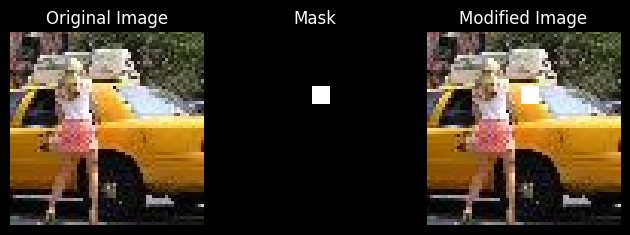

mask status: ('rectangle', (25, 25))


<Figure size 640x480 with 0 Axes>

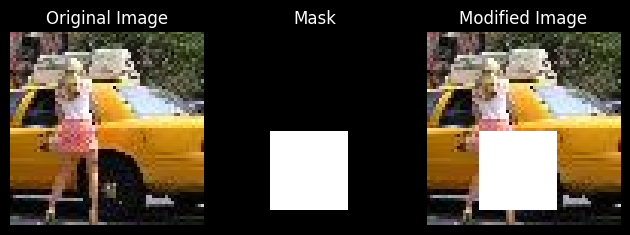

mask status: ('rectangle', (50, 50))


<Figure size 640x480 with 0 Axes>

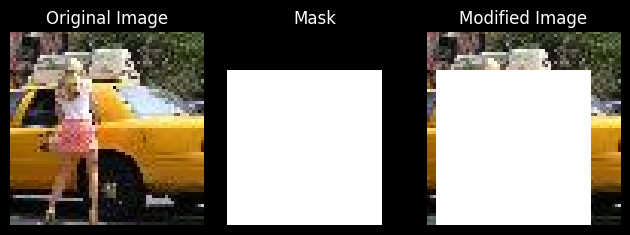



mask status: ('circle', (5,))


<Figure size 640x480 with 0 Axes>

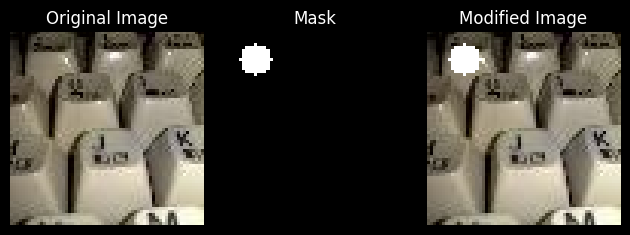

mask status: ('circle', (13,))


<Figure size 640x480 with 0 Axes>

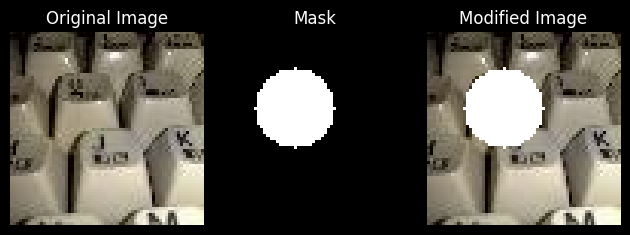

mask status: ('circle', (31,))


<Figure size 640x480 with 0 Axes>

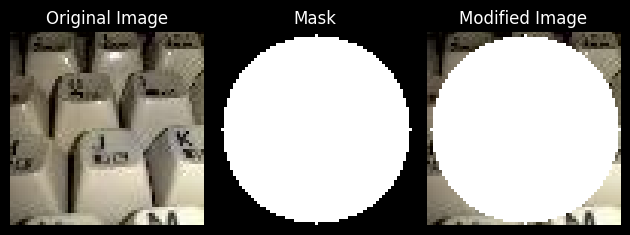



mask status: ('ellipse', (6, 3, 0, 0, 360))


<Figure size 640x480 with 0 Axes>

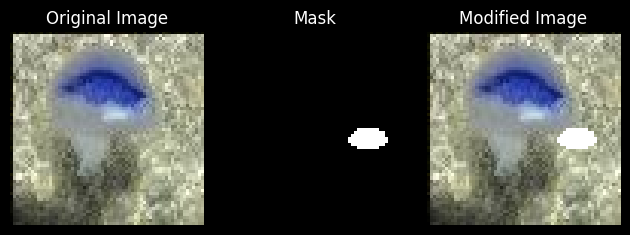

mask status: ('ellipse', (16, 10, 0, 0, 360))


<Figure size 640x480 with 0 Axes>

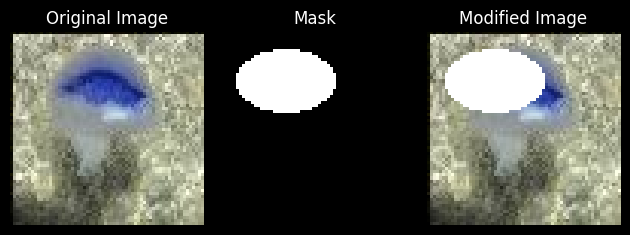

mask status: ('ellipse', (31, 27, 0, 0, 360))


<Figure size 640x480 with 0 Axes>

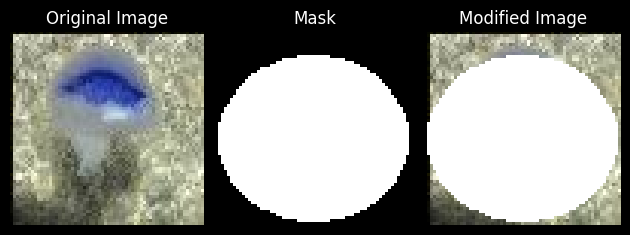



mask status: ('ellipse', (6, 3, 90, 0, 360))


<Figure size 640x480 with 0 Axes>

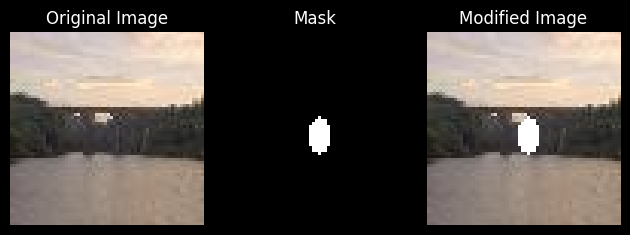

mask status: ('ellipse', (16, 10, 90, 0, 360))


<Figure size 640x480 with 0 Axes>

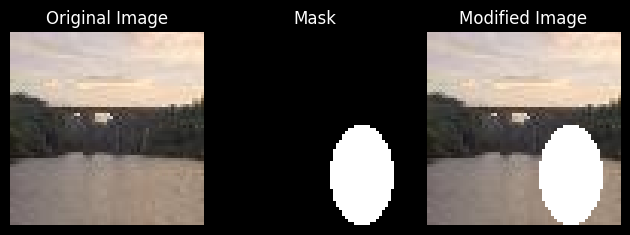

mask status: ('ellipse', (31, 27, 90, 0, 360))


<Figure size 640x480 with 0 Axes>

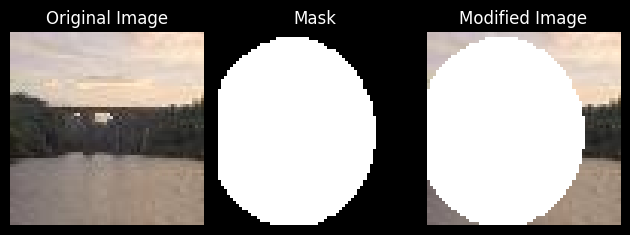



mask status: ('ellipse', (6, 3, 45, 0, 360))


<Figure size 640x480 with 0 Axes>

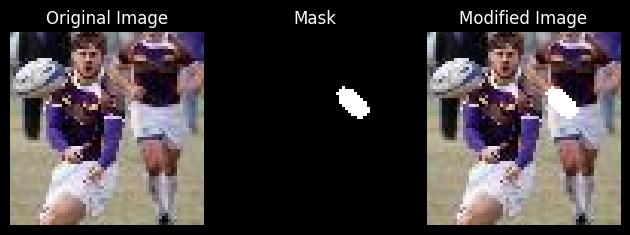

mask status: ('ellipse', (16, 10, 45, 0, 360))


<Figure size 640x480 with 0 Axes>

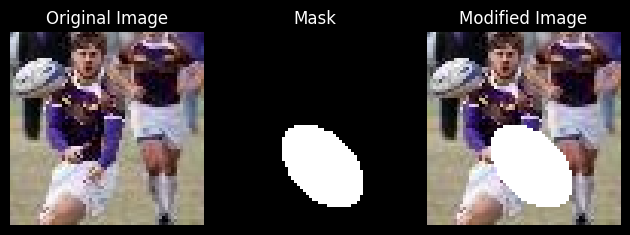

mask status: ('ellipse', (31, 27, 45, 0, 360))


<Figure size 640x480 with 0 Axes>

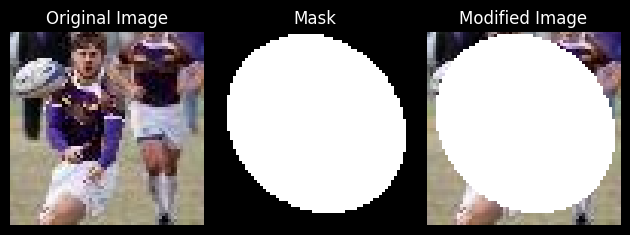

<Figure size 640x480 with 0 Axes>

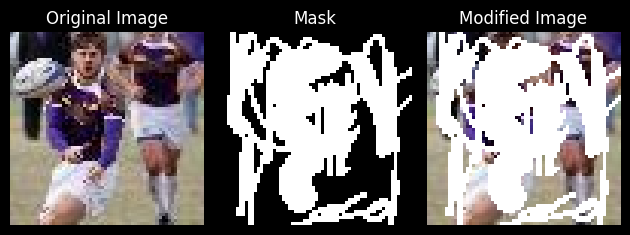

<Figure size 640x480 with 0 Axes>

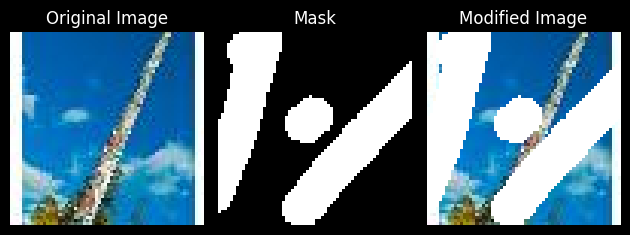

<Figure size 640x480 with 0 Axes>

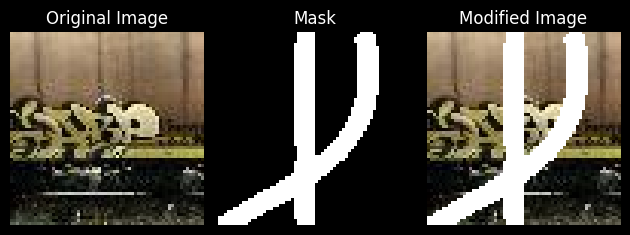

<Figure size 640x480 with 0 Axes>

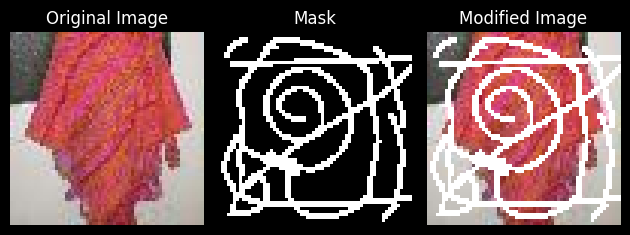

In [ ]:
def tester_image_mask():
  # original tensor
  tinyimg = TinyImageNet()
  dut = ImageMask(tinyimg[100], 'rectangle', (5, 5))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('rectangle', (25, 25))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('rectangle', (50, 50))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[201])
  dut.set_mask('circle', (5,))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('circle', (13,))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('circle', (31,))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[220])
  dut.set_mask('ellipse', (6, 3, 0, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('ellipse', (16, 10, 0, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('ellipse', (31, 27, 0, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[420])
  dut.set_mask('ellipse', (6, 3, 90, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('ellipse', (16, 10, 90, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('ellipse', (31, 27, 90, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[350])
  dut.set_mask('ellipse', (6, 3, 45, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('ellipse', (16, 10, 45, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  dut.set_mask('ellipse', (31, 27, 45, 0, 360))
  print('mask status:', dut.get_mask_status())
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[350])
  dut.set_mask('custom', '1.png')
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[400])
  dut.set_mask('custom', '2.png')
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[200])
  dut.set_mask('custom', '3.png')
  dut.plot_results()
  print('\n')

  dut.set_image(tinyimg[240])
  dut.set_mask('custom', '4.png')
  dut.plot_results()
  print('\n')


tester_image_mask()
# for i in range(0, 10):
#   tester_image_mask()

In [ ]:
class AlteredImages(Dataset):
  def __init__(self, tinyimagenet: TinyImageNet, imagemask: ImageMask):
    self.tinyimagenet = tinyimagenet
    self.imagemask = imagemask
    # don't forget to set default values for different types of masks

  def __len__(self):
    return self.tinyimagenet.__len__()

  def __getitem__(self, index):
    # dataloader object will call here
    current_split = None
    # Based on index, get the current split
    if index >= 0 and index <= 99999:
      current_split = 'train'
    elif index >= 100000 and index <= 109999:
      current_split = 'test'
    elif index >= 110000 and index <= 119999:
      current_split = 'val'
    else:
      raise IndexError('Index out of range, index range is between 0 and 119999')

    # only retur data if the current split is the same as the set split
    # DO NOT MODIFY the tinyimgnet object split here (this is done in the set_data function)
    if current_split == self.tinyimagenet.get_split():
      self.imagemask.set_image(self.tinyimagenet[index])
      # set some settings for image mask
      return self.imagemask.get_modified_image()
    else:
      raise Exception('Current split of AlteredImages does not match TinyImageNet split')

In [ ]:
# Custom Sampler for dataloader
class ImageSampler(Sampler):
  def __init__(self, tinyimgnet: TinyImageNet):
    self.tinyimgnet = tinyimgnet
    self.split = None
    self.split_indices = None

  def  __get_split_indices(self):
    """
    Determine the start and end indices based on the split.

    Output:
    - list of indices corresponding to the specified split.
    """
    match self.split:
      case 'train':
        start_idx, end_idx = 0, 99999
      case 'test':
        start_idx, end_idx = 100000, 109999
      case 'val':
        start_idx, end_idx = 110000, 119999
      case _:
        raise ValueError(f"Invalid split: {self.split}. Expected one of 'train', 'test', or 'val'.")
    return list(range(start_idx, end_idx + 1))

  def __len__(self):
   return len(self.split_indices)

  def __iter__(self):
    return iter(self.split_indices)

  def set_sampler_state(self):
    """
    Call this method after setting the tinyimgnet object split
    Do this each time the split changes
    """
    self.split = self.tinyimgnet.get_split()
    self.split_indices = self.__get_split_indices()

    # shuffle the indexes
    random.seed()
    random.shuffle(self.split_indices)




In [ ]:
# mask settings
mask_settings = {
  'square': [
    ['rectangle', (2, 2)],   # 0
    ['rectangle', (5, 5)],   # 1
    ['rectangle', (12, 12)], # 2
    ['rectangle', (15, 15)], # 3
    ['rectangle', (17, 17)], # 4
    ['rectangle', (21, 21)], # 5
    ['rectangle', (23, 23)], # 6
    ['rectangle', (27, 27)], # 7
    ['rectangle', (30, 30)], # 8
    ['rectangle', (34, 34)], # 9
    ['rectangle', (40, 40)], # 10
    ['rectangle', (45, 45)], # 11
    ['rectangle', (50, 50)], # 12
  ],

  'rectangle':[
    ['rectangle', (3, 2)],   # 0
    ['rectangle', (7, 5)],   # 1
    ['rectangle', (10, 7)],  # 2
    ['rectangle', (12, 9)],  # 3
    ['rectangle', (15, 10)], # 4
    ['rectangle', (19, 12)], # 5
    ['rectangle', (20, 16)], # 6
    ['rectangle', (24, 19)], # 7
    ['rectangle', (27, 20)], # 8
    ['rectangle', (27, 20)], # 9
    ['rectangle', (30, 25)], # 10
    ['rectangle', (32, 28)], # 11
    ['rectangle', (36, 30)], # 12
    ['rectangle', (40, 33)], # 13
    ['rectangle', (45, 35)], # 14
    ['rectangle', (50, 40)]  # 15
  ],

  'circle':[
    ['circle', (2,)],   # 0
    ['circle', (5,)],   # 1
    ['circle', (7,)],   # 2
    ['circle', (10,)],  # 3
    ['circle', (13,)],  # 4
    ['circle', (17,)],  # 5
    ['circle', (21,)],  # 6
    ['circle', (24,)],  # 7
    ['circle', (26,)],  # 8
    ['circle', (29,)],  # 9
    ['circle', (30,)],  # 10
  ],

  'ellipse':[
    # angle 0
    ['ellipse', (3, 2, 0, 0, 360)],   # 0
    ['ellipse', (7, 4, 0, 0, 360)],   # 1
    ['ellipse', (12, 9, 0, 0, 360)],  # 2
    ['ellipse', (15, 11, 0, 0, 360)], # 3
    ['ellipse', (18, 13, 0, 0, 360)], # 4
    ['ellipse', (21, 16, 0, 0, 360)], # 5
    ['ellipse', (25, 20, 0, 0, 360)], # 6
    ['ellipse', (28, 23, 0, 0, 360)], # 7
    ['ellipse', (30, 25, 0, 0, 360)], # 8
    ['ellipse', (30, 28, 0, 0, 360)], # 9
    ['ellipse', (31, 30, 0, 0, 360)], # 10

    # angle 90
    ['ellipse', (3, 3, 90, 0, 360)],  # 11
    ['ellipse', (7, 4, 90, 0, 360)],  # 12
    ['ellipse', (10, 5, 90, 0, 360)], # 13
    ['ellipse', (13, 9, 90, 0, 360)], # 14
    ['ellipse', (16, 11, 90, 0, 360)],# 15
    ['ellipse', (20, 14, 90, 0, 360)],# 16
    ['ellipse', (23, 17, 90, 0, 360)],# 17
    ['ellipse', (27, 19, 90, 0, 360)],# 18
    ['ellipse', (28, 21, 90, 0, 360)],# 19
    ['ellipse', (29, 23, 90, 0, 360)],# 20
    ['ellipse', (30, 25, 90, 0, 360)],# 21
    ['ellipse', (31, 27, 90, 0, 360)],# 22
    ['ellipse', (31, 29, 90, 0, 360)],# 23

    # angle 45
    ['ellipse', (2, 2, 45, 0, 360)],  # 24
    ['ellipse', (7, 4, 45, 0, 360)],  # 25
    ['ellipse', (11, 6, 45, 0, 360)], # 26
    ['ellipse', (14, 10, 45, 0, 360)],# 27
    ['ellipse', (19, 12, 45, 0, 360)],# 28
    ['ellipse', (22, 15, 45, 0, 360)],# 29
    ['ellipse', (25, 18, 45, 0, 360)],# 30
    ['ellipse', (28, 20, 45, 0, 360)],# 31
    ['ellipse', (32, 24, 45, 0, 360)],# 32
    ['ellipse', (35, 25, 45, 0, 360)],# 333
  ]
}

In [ ]:
# Helper functions
def set_data_settings(split: Split, mask_setting):
  """
  Configures the data
  The tinyimagenet object and imagemask object have to exist before this function is called.
  Input:
    split: Split - the split of tinyimgnet object
    image - an image from the tinyimgnet object -> in the form of image[x]
    mask_setting - settings for the mask - one of the key - value pairs in the mask_settings dictionary

  Output:
    None
  """
  tinyimagenet.set_split(split) # set split
  imagemask.set_image(tinyimagenet[get_random_index()]) # initial image of the imagemask object. This will change in the dataloader
  imagemask.set_mask(*mask_setting) # apply mask settings

def get_random_index():
  random.seed()
  split = tinyimagenet.get_split()
  match split:
    case 'train':
      index = random.randrange(0, 99999 + 1, 1)
    case 'test':
      index = random.randrange(100000, 109999 + 1, 1)
    case 'val':
      index = random.randrange(110000, 119999 + 1, 1)
  return index

In [ ]:
# define tinyimgnet, imagemask, altered_images, image_sampler objects with dummy values
tinyimagenet = TinyImageNet()
imagemask = ImageMask(torch.zeros(1, 1, 3),  'rectangle', (1, 1))
altered_images = AlteredImages(tinyimagenet, imagemask)
image_sampler = ImageSampler(tinyimagenet)

Dataset archive already downloaded
Zip archive already extracted
Custom masks folder already downloaded.


In [ ]:
# dataloader - define the data loader
tinyimgnet_dataloader = DataLoader(dataset = altered_images, batch_size = 32, sampler = image_sampler, num_workers = 2)

In [ ]:
# set image data and sampler
# Repeat this cell with different split and mask setting values
split = 'val'
mask_setting = mask_settings['rectangle'][6]
set_data_settings(split, mask_setting) # make sure to define needed objects before calling this
image_sampler.set_sampler_state() # don't forget to set the sampler's new state

TypeError: Image data of dtype object cannot be converted to float

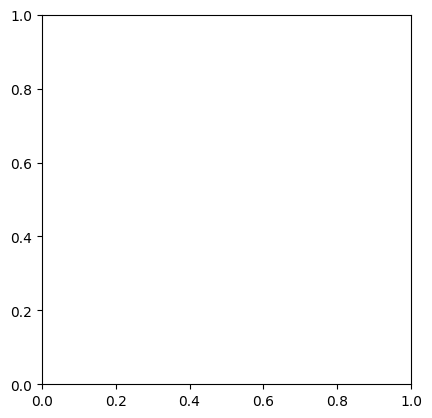

In [ ]:
# show a batch of images from the DataLoader
for batch in tinyimgnet_dataloader:
  # show a batch
  for img in batch:
    plt.imshow(img.permute(1,2,0).numpy)
    plt.show()
  break

In [ ]:
# set image data and sampler
# Repeat this cell with different split and mask setting values
split = 'test'
mask_setting = mask_settings['ellipse'][14]
set_data_settings(split, mask_setting) # make sure to define needed objects before calling this
image_sampler.set_sampler_state() # don't forget to set the sampler's new state

In [ ]:
# show a batch of images from the DataLoader
for batch in tinyimgnet_dataloader:
  # show a batch
  for img in batch:
    plt.imshow(img)
    plt.show()
  break

In [ ]:
# set image data and sampler
# Repeat this cell with different split and mask setting values
split = 'test'
mask_setting = mask_settings['circle'][5]
set_data_settings(split, mask_setting) # make sure to define needed objects before calling this
image_sampler.set_sampler_state() # don't forget to set the sampler's new state

In [ ]:
# show a batch of images from the DataLoader
for batch in tinyimgnet_dataloader:
  # show a batch
  for img in batch:
    plt.imshow(img)
    plt.show()
  break

In [ ]:
# inpaint model
class Inpaint():
  def __init__(self):
    pass